In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import count
import numpy as np
import sklearn as skl

In [8]:
import seaborn as sb
!pip show seaborn

Name: seaborn
Version: 0.12.1
Summary: Statistical data visualization
Home-page: None
Author: None
Author-email: Michael Waskom <mwaskom@gmail.com>
License: None
Location: /usr/local/lib/python3.9/site-packages
Requires: numpy, pandas, matplotlib
Required-by: ydata-profiling


**Shade:** I attach one year of data that I am running regressions on. It is not large – about 200 countries by 21 variables: 

6 dependent variables, 

13 triad (independent) variables, and 

2 control variables. One of the control variables I build from the attached data – per capita GDP.  

I have the same dataset for about 17 years (and slowly adding more).

The dependent variables are 6 separate index values published annually by the World Bank covering different dimensions of national stability. Each index has a continuous values from around -2.5 to +2.5. Higher values are better (more stable) countries. They indexes are:

Voice and accountability

Political stability

Government effectiveness

Regulatory quality

Rule of law

Control of corruption
 

For each index, I wanted to see if any triads are related to higher index scores. The literature predicts that triad 13 should be positively related to stability and triad 6 should be negatively related. Beyond that, there is almost no literature. There is some literature that says triad 7 is positively related to improved regulatory networks. Beyond those 3 triads, there is basically no literature that I know of.

 

My first thought was just to do a simple correlation between each triad separately. But I think it will make a better paper to do also a multivariate regression. Here is where I need help though. For me it seems like 13 independent variables is too many, but I don’t know the correct way to reduce this number. I could find no multicollinearity among the variables. Also, these are not truly independent variables. As you pointed out, when one triad increases, others must decrease (As a percent of total).

 

If you are interested to work on this, you would of course be welcome to be a co-author, but also, if you are in need of some summer salary we can do that also! Let me know what you think,

Shade


**Enrico:** All 6 stability indices are bounded within $\pm$ 2.5. Rescale them between zero and 1, then perform logistic regression.

In [11]:
!pwd

/Users/Enrico/Desktop/GDP


In [4]:
df = pd.read_csv('data_2019.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               228 non-null    int64  
 1   harmonized.name  228 non-null    object 
 2   triad_01         205 non-null    float64
 3   triad_02         205 non-null    float64
 4   triad_03         205 non-null    float64
 5   triad_04         205 non-null    float64
 6   triad_05         205 non-null    float64
 7   triad_06         205 non-null    float64
 8   triad_07         205 non-null    float64
 9   triad_08         205 non-null    float64
 10  triad_09         205 non-null    float64
 11  triad_10         205 non-null    float64
 12  triad_11         205 non-null    float64
 13  triad_12         205 non-null    float64
 14  triad_13         205 non-null    float64
 15  wgi.corrupt      208 non-null    float64
 16  wgi.govt         208 non-null    float64
 17  wgi.stability   

In [17]:
# remove countries with NaN value
df = df.dropna(axis=0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 227
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               186 non-null    int64  
 1   harmonized.name  186 non-null    object 
 2   triad_01         186 non-null    float64
 3   triad_02         186 non-null    float64
 4   triad_03         186 non-null    float64
 5   triad_04         186 non-null    float64
 6   triad_05         186 non-null    float64
 7   triad_06         186 non-null    float64
 8   triad_07         186 non-null    float64
 9   triad_08         186 non-null    float64
 10  triad_09         186 non-null    float64
 11  triad_10         186 non-null    float64
 12  triad_11         186 non-null    float64
 13  triad_12         186 non-null    float64
 14  triad_13         186 non-null    float64
 15  wgi.corrupt      186 non-null    float64
 16  wgi.govt         186 non-null    float64
 17  wgi.stability   

In [37]:
# 1. Replace missing data withtheir median
# 2. Feature Scaling -> Standardization

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler',StandardScaler())
    ])


#Replace all missing entries with their medians

imputer = SimpleImputer(strategy='median')
imputer.fit(features)

X = num_pipeline.fit_transform(features)
features = pd.DataFrame(X,columns=features.columns,index=features.index)

In [20]:
# Linear Fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

In [39]:
len(test_set)

38

In [83]:
# columns to drop in the input matrix:
list = ['harmonized.name','yr',
        'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
        'gdp','pop','pc.gdp']

features = train_set.drop(list,axis=1)
labels = train_set['wgi.voice'].copy()

X = num_pipeline.fit_transform(features)
features = pd.DataFrame(X,columns=features.columns,index=features.index)

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(X,labels)

LinearRegression()

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


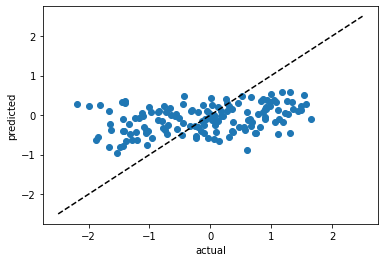

In [85]:
plt.scatter(labels,lin_reg.predict(features))
plt.plot([-2.5,2.5],[-2.5,2.5],'--',c='k')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<AxesSubplot:>

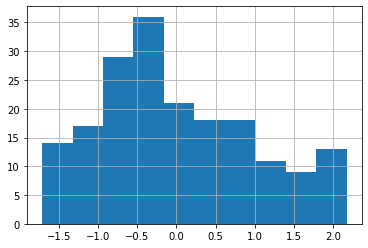

In [87]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.corrupt'].hist()

<AxesSubplot:>

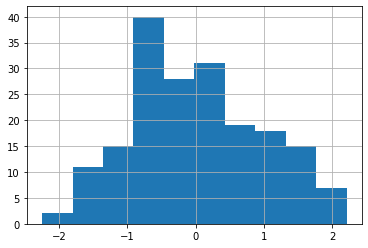

In [88]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.govt'].hist()

<AxesSubplot:>

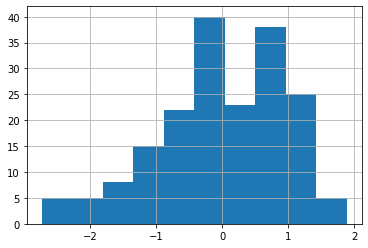

In [89]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.stability'].hist()

<AxesSubplot:>

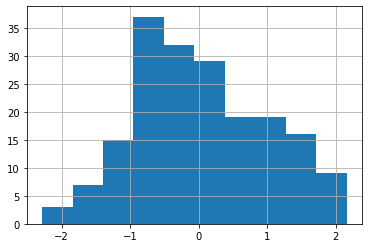

In [90]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.regulatory'].hist()

In [94]:
labels = ['wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice']

In [95]:
for label in labels:
    print(df[label].min(),df[label].max())

-1.70907258987427 2.16713047027588
-2.25098657608032 2.21273446083069
-2.72988080978394 1.8838939666748
-2.28220462799072 2.1601128578186
-2.37018537521362 2.04878187179565
-2.1851224899292 1.6552220582962


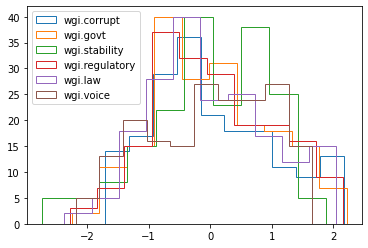

In [107]:
for label in labels:
    plt.hist(df[label],alpha = 1, histtype='step',label=label)
    plt.legend(loc=2)

In [113]:
data = df.drop(['yr','harmonized.name'],axis=1)

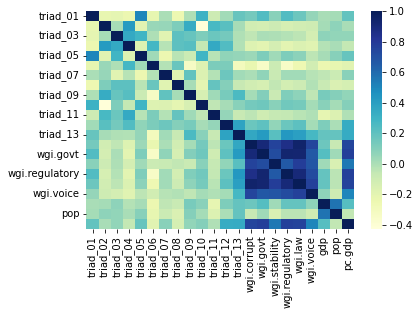

In [117]:
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=False)


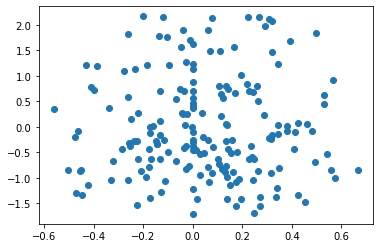

In [126]:
plt.scatter(df['triad_07'],df[labels[0]])

In [122]:
df[['triad_6',labels[0]]]

,triad_13,wgi.corrupt
0,0.000000,-1.407710
1,0.000000,-0.543374
2,0.301411,-0.635694
3,0.000000,1.840800
4,0.000000,1.231043
...,...,...
220,0.000000,-0.259581
222,0.390289,-0.524321
224,0.000000,-0.330311
226,-0.160661,-0.662320


<AxesSubplot:xlabel='triad_01', ylabel='triad_02'>

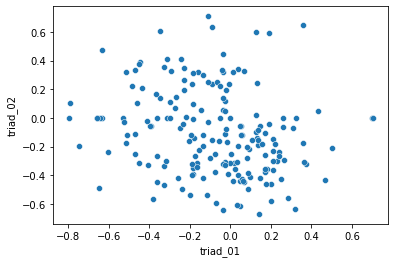

In [132]:
sb.scatterplot(df, x="triad_01", y="triad_02")

In [141]:
df.columns

Index(['yr', 'harmonized.name', 'triad_01', 'triad_02', 'triad_03', 'triad_04',
       'triad_05', 'triad_06', 'triad_07', 'triad_08', 'triad_09', 'triad_10',
       'triad_11', 'triad_12', 'triad_13', 'wgi.corrupt', 'wgi.govt',
       'wgi.stability', 'wgi.regulatory', 'wgi.law', 'wgi.voice', 'gdp', 'pop',
       'pc.gdp'],
      dtype='object')

In [144]:
variables = np.array(df.columns)

In [145]:
variables

array(['yr', 'harmonized.name', 'triad_01', 'triad_02', 'triad_03',
       'triad_04', 'triad_05', 'triad_06', 'triad_07', 'triad_08',
       'triad_09', 'triad_10', 'triad_11', 'triad_12', 'triad_13',
       'wgi.corrupt', 'wgi.govt', 'wgi.stability', 'wgi.regulatory',
       'wgi.law', 'wgi.voice', 'gdp', 'pop', 'pc.gdp'], dtype=object)

<AxesSubplot:xlabel='triad_01', ylabel='wgi.voice'>

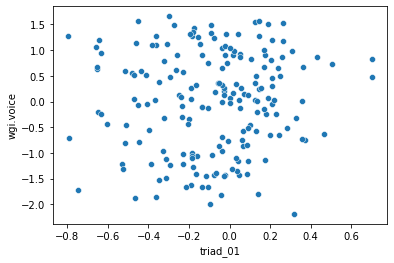

In [146]:
var1 = 'triad_01'
var2 = 'wgi.voice'

sb.scatterplot(df, x=var1, y=var2)

In [149]:
df[[var1,var2,'harmonized.name']]

,triad_01,wgi.voice,harmonized.name
0,-0.185087,-1.006747,Afghanistan
1,0.068945,0.142711,Albania
2,-0.160862,-1.053524,Algeria
3,-0.364029,1.272709,American Samoa
4,-0.310922,1.110087,Andorra
...,...,...,...
220,-0.655749,0.680349,Vanuatu
222,0.084107,-1.405620,Viet Nam
224,-0.230146,-1.026805,West Bank and Gaza
226,-0.234745,-0.309643,Zambia
